
# Import Library Yang dibutuhkan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import skfuzzy as fuzz
from skfuzzy import cluster
from pathlib import Path

# Load Semua Dataset yang dibutuhkan

In [11]:
BASE_DIR = Path('dataset')
TRAIN_DIR = BASE_DIR / 'train'


In [12]:
KOMODITAS = {
    'bawang_merah': 'Bawang Merah.csv',
    'beras_medium': 'Beras Medium.csv',
    'beras_premium' : 'Beras Premium.csv',
    'minyak_curah': 'Minyak Goreng Curah.csv',
    'telur_ayam': 'Telur Ayam Ras.csv',
    'gula': 'Gula Konsumsi.csv',
    'Bawang_Putih_Bonggol' : 'Bawang Putih Bonggol.csv',
    'Cabai_Merah_Keriting' : 'Cabai Merah Keriting.csv',
    'Cabai_Rawit_Merah' : 'Cabai Rawit Merah.csv',
    'Daging_Ayam_Ras' : 'Daging Ayam Ras.csv',
    'Daging_Sapi_Murni': 'Daging Sapi Murni.csv',
    'Minyak_Goreng_Kemasan_Sederhana' : 'Minyak Goreng Kemasan Sederhana.csv',
    'Tepung_Terigu_Curah' : 'Tepung Terigu (Curah).csv'
}



In [13]:
data = {}
for key, filename in KOMODITAS.items():
    file_path = TRAIN_DIR / filename
    data[key] = pd.read_csv(file_path)
    print(f"✓ {key}: {data[key].shape}")


✓ bawang_merah: (1004, 35)
✓ beras_medium: (1004, 35)
✓ beras_premium: (1004, 35)
✓ minyak_curah: (1004, 35)
✓ telur_ayam: (1004, 35)
✓ gula: (1004, 35)
✓ Bawang_Putih_Bonggol: (1004, 35)
✓ Cabai_Merah_Keriting: (1004, 35)
✓ Cabai_Rawit_Merah: (1004, 35)
✓ Daging_Ayam_Ras: (1004, 35)
✓ Daging_Sapi_Murni: (1004, 35)
✓ Minyak_Goreng_Kemasan_Sederhana: (1004, 35)
✓ Tepung_Terigu_Curah: (1004, 35)


# EXPLORATORY DATA ANALYSIS(EDA)

In [14]:
print("=" * 70)
print("DATA SHAPE")
print("=" * 70)
for key, df in data.items():
    print(f"{key:20s} : {df.shape[0]} rows × {df.shape[1]} columns")


DATA SHAPE
bawang_merah         : 1004 rows × 35 columns
beras_medium         : 1004 rows × 35 columns
beras_premium        : 1004 rows × 35 columns
minyak_curah         : 1004 rows × 35 columns
telur_ayam           : 1004 rows × 35 columns
gula                 : 1004 rows × 35 columns
Bawang_Putih_Bonggol : 1004 rows × 35 columns
Cabai_Merah_Keriting : 1004 rows × 35 columns
Cabai_Rawit_Merah    : 1004 rows × 35 columns
Daging_Ayam_Ras      : 1004 rows × 35 columns
Daging_Sapi_Murni    : 1004 rows × 35 columns
Minyak_Goreng_Kemasan_Sederhana : 1004 rows × 35 columns
Tepung_Terigu_Curah  : 1004 rows × 35 columns


In [15]:
print("\n" + "=" * 70)
print("SAMPLE DATA: Bawang Merah (First 5 rows)")
print("=" * 70)
print(data['bawang_merah'].head())


SAMPLE DATA: Bawang Merah (First 5 rows)
         Date     Aceh     Bali   Banten  Bengkulu  DI Yogyakarta  \
0  2022-01-01  28970.0  20870.0  26890.0   26650.0        25240.0   
1  2022-01-02  29900.0  20710.0  25600.0   26950.0        25240.0   
2  2022-01-03  28970.0  20510.0  26390.0   27290.0        24620.0   
3  2022-01-04  29600.0  20180.0  26630.0   27450.0        24370.0   
4  2022-01-05  29540.0  19960.0  26610.0   27710.0        24210.0   

   DKI Jakarta  Gorontalo    Jambi  Jawa Barat  ...    Papua     Riau  \
0      35510.0    31740.0  23390.0     25800.0  ...  48610.0  29240.0   
1      31850.0    30020.0  23550.0     26010.0  ...  50160.0  28750.0   
2      34880.0    31250.0  23730.0     25910.0  ...  49510.0  27870.0   
3      35260.0    31640.0  23300.0     25950.0  ...  49670.0  28330.0   
4      35260.0    34010.0  23640.0     25700.0  ...  46590.0  28240.0   

   Sulawesi Barat  Sulawesi Selatan  Sulawesi Tengah  Sulawesi Tenggara  \
0         25160.0           2

In [16]:
print("\n" + "=" * 70)
print("MISSING VALUES")
print("=" * 70)
for key, df in data.items():
    total_cells = df.shape[0] * df.shape[1]
    missing = df.isnull().sum().sum()
    missing_pct = (missing / total_cells) * 100
    print(f"{key:20s} : {missing} missing ({missing_pct:.2f}%)")


MISSING VALUES
bawang_merah         : 1241 missing (3.53%)
beras_medium         : 1241 missing (3.53%)
beras_premium        : 1241 missing (3.53%)
minyak_curah         : 5437 missing (15.47%)
telur_ayam           : 1241 missing (3.53%)
gula                 : 1241 missing (3.53%)
Bawang_Putih_Bonggol : 1241 missing (3.53%)
Cabai_Merah_Keriting : 1244 missing (3.54%)
Cabai_Rawit_Merah    : 2035 missing (5.79%)
Daging_Ayam_Ras      : 1241 missing (3.53%)
Daging_Sapi_Murni    : 1245 missing (3.54%)
Minyak_Goreng_Kemasan_Sederhana : 1289 missing (3.67%)
Tepung_Terigu_Curah  : 1242 missing (3.53%)


In [17]:
print("=" * 70)
print("MISSING VALUE PATTERN ANALYSIS")
print("=" * 70)

for key, df in data.items():
    print(f"\n📊 {key.upper()}")
    print("-" * 70)
    
    # Hitung missing per kolom (provinsi)
    missing_per_col = df.isnull().sum()
    missing_per_col = missing_per_col[missing_per_col > 0].sort_values(ascending=False)
    
    if len(missing_per_col) > 0:
        print(f"Provinsi dengan missing value:")
        for prov, count in missing_per_col.head(10).items():
            pct = (count / len(df)) * 100
            print(f"  {prov:25s} : {count:4d} missing ({pct:5.2f}%)")
    else:
        print("  ✓ No missing values")
    
    # Hitung missing per baris (tanggal)
    missing_per_row = df.isnull().sum(axis=1)
    rows_with_missing = (missing_per_row > 0).sum()
    print(f"\nBaris dengan missing: {rows_with_missing} dari {len(df)} ({(rows_with_missing/len(df))*100:.2f}%)")

MISSING VALUE PATTERN ANALYSIS

📊 BAWANG_MERAH
----------------------------------------------------------------------
Provinsi dengan missing value:
  Kalimantan Timur          :   39 missing ( 3.88%)
  Kepulauan Riau            :   39 missing ( 3.88%)
  Sulawesi Barat            :   39 missing ( 3.88%)
  Papua Barat               :   39 missing ( 3.88%)
  Kalimantan Utara          :   39 missing ( 3.88%)
  Sumatera Selatan          :   38 missing ( 3.78%)
  Kepulauan Bangka Belitung :   38 missing ( 3.78%)
  Jambi                     :   38 missing ( 3.78%)
  Nusa Tenggara Barat       :   37 missing ( 3.69%)
  Aceh                      :   37 missing ( 3.69%)

Baris dengan missing: 46 dari 1004 (4.58%)

📊 BERAS_MEDIUM
----------------------------------------------------------------------
Provinsi dengan missing value:
  Kalimantan Timur          :   39 missing ( 3.88%)
  Kepulauan Riau            :   39 missing ( 3.88%)
  Sulawesi Barat            :   39 missing ( 3.88%)
  Papua Barat

# Analisis

dapat dilihat dari analisis missing value pattern,komoditas Cabe Rawit dan Minyak Curah menunjukkan missing value yg parah masing-masing $\pm 48\% $ dan $\pm 80 \% $,maka dari itu daripada drop provinsi lebih baik drop komoditas dengan tujuan agar tetap relevent dengan judul saya.

In [18]:
print("="*70)
print("MISSING VALUE ANALYSIS — DECIDING WHICH COMMODITIES TO DROP")
print("="*70)

DROP_COMMODITIES = []

for key, df in data.items():
    missing_per_col = df.isnull().sum()
    missing_per_col = missing_per_col[missing_per_col > 0]
    
    if len(missing_per_col) == 0:
        print(f"✓ {key:25s} | No missing | KEEP")
        continue

    # Missing % per provinsi
    missing_pct = missing_per_col / len(df) * 100
    
    prov_high = (missing_pct > 15).sum()
    prov_extreme = (missing_pct > 50).sum()
    worst_pct = missing_pct.max()

    # Keputusan: drop komoditas jika terlalu buruk
    if prov_extreme > 0 or prov_high > 3:
        DROP_COMMODITIES.append(key)
        print(f"❌ {key:25s} | Worst {worst_pct:5.1f}% | Drop commodity")
    else:
        print(f"✓ {key:25s} | Worst {worst_pct:5.1f}% | Keep")

print(f"\nFINAL DECISION: Keep {13 - len(DROP_COMMODITIES)}, Drop {len(DROP_COMMODITIES)}\n")


MISSING VALUE ANALYSIS — DECIDING WHICH COMMODITIES TO DROP
✓ bawang_merah              | Worst   3.9% | Keep
✓ beras_medium              | Worst   3.9% | Keep
✓ beras_premium             | Worst   3.9% | Keep
❌ minyak_curah              | Worst  34.3% | Drop commodity
✓ telur_ayam                | Worst   3.9% | Keep
✓ gula                      | Worst   3.9% | Keep
✓ Bawang_Putih_Bonggol      | Worst   3.9% | Keep
✓ Cabai_Merah_Keriting      | Worst   3.9% | Keep
❌ Cabai_Rawit_Merah         | Worst  77.9% | Drop commodity
✓ Daging_Ayam_Ras           | Worst   3.9% | Keep
✓ Daging_Sapi_Murni         | Worst   4.0% | Keep
✓ Minyak_Goreng_Kemasan_Sederhana | Worst   8.2% | Keep
✓ Tepung_Terigu_Curah       | Worst   4.0% | Keep

FINAL DECISION: Keep 11, Drop 2



# Penjelasan Cleaning Data

drop 2 komoditas yaitu minyak_curah dan cabai rawit merah dan untuk missing value lain pakai linear interpolation

In [21]:
data_clean = {}

print("="*70)
print("HANDLING MISSING VALUES (Conservative Approach)")
print("="*70)
print("Strategy: Interpolasi HANYA gap ≤ 10 hari")
print("          Gap > 10 hari TETAP NULL")
print("="*70 + "\n")

for key, df in data.items():
    if key in DROP_COMMODITIES:
        print(f"⊗ {key:25s} | SKIPPED")
        continue
    
    df_clean = df.copy()
    
    for col in df.columns:
        if col == 'Date':
            continue
        
        if not df[col].isnull().any():
            continue
        
        # Interpolasi HANYA untuk gap kecil (≤ 10 hari)
        df_clean[col] = df[col].interpolate(method='linear', limit=10, limit_direction='both')
    
    missing_before = df.isnull().sum().sum()
    missing_after = df_clean.isnull().sum().sum()
    
    data_clean[key] = df_clean
    
    print(f"✓ {key:25s} | Before: {missing_before:4d} | After: {missing_after:4d} | Gap >10 preserved")

print(f"\n✅ Done: {len(data_clean)} commodities")

HANDLING MISSING VALUES (Conservative Approach)
Strategy: Interpolasi HANYA gap ≤ 10 hari
          Gap > 10 hari TETAP NULL

✓ bawang_merah              | Before: 1241 | After:  480 | Gap >10 preserved
✓ beras_medium              | Before: 1241 | After:  480 | Gap >10 preserved
✓ beras_premium             | Before: 1241 | After:  480 | Gap >10 preserved
⊗ minyak_curah              | SKIPPED
✓ telur_ayam                | Before: 1241 | After:  480 | Gap >10 preserved
✓ gula                      | Before: 1241 | After:  480 | Gap >10 preserved
✓ Bawang_Putih_Bonggol      | Before: 1241 | After:  480 | Gap >10 preserved
✓ Cabai_Merah_Keriting      | Before: 1244 | After:  480 | Gap >10 preserved
⊗ Cabai_Rawit_Merah         | SKIPPED
✓ Daging_Ayam_Ras           | Before: 1241 | After:  480 | Gap >10 preserved
✓ Daging_Sapi_Murni         | Before: 1245 | After:  480 | Gap >10 preserved
✓ Minyak_Goreng_Kemasan_Sederhana | Before: 1289 | After:  524 | Gap >10 preserved
✓ Tepung_Terigu_Curah 

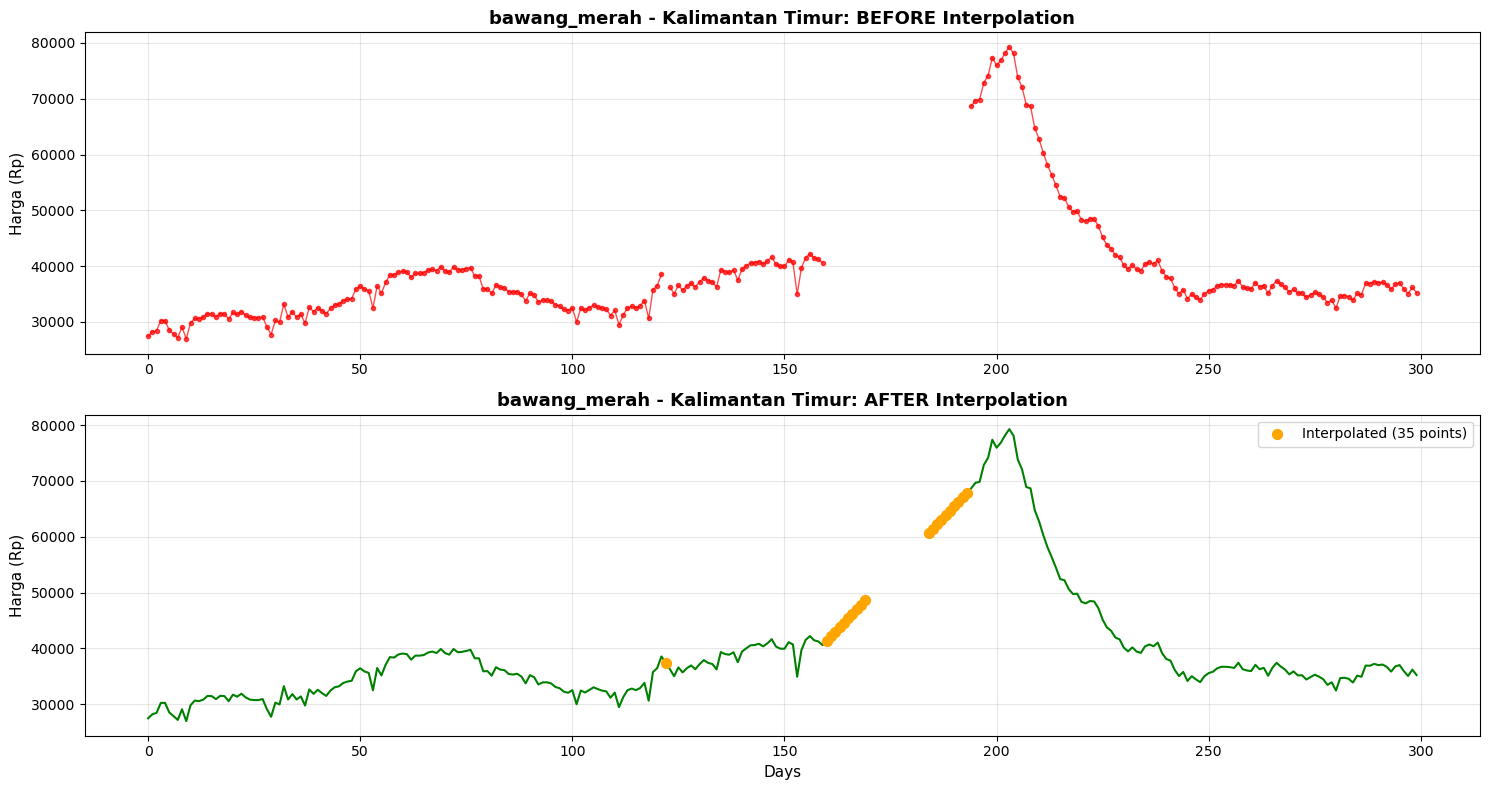


Missing before: 35
Missing after: 14
Interpolated points: 35


In [22]:
commodity = 'bawang_merah'
province = 'Kalimantan Timur'
start, end = 0, 300

df_orig = data[commodity]
df_clean = data_clean[commodity]

# Plot
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Before
axes[0].plot(df_orig[province].iloc[start:end], 
             marker='o', markersize=3, linewidth=1, color='red', alpha=0.7)
axes[0].set_title(f'{commodity} - {province}: BEFORE Interpolation', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Harga (Rp)', fontsize=11)
axes[0].grid(True, alpha=0.3)

# After
axes[1].plot(df_clean[province].iloc[start:end], linewidth=1.5, color='green')

# Highlight interpolated points
was_missing = df_orig[province].iloc[start:end].isnull()
interpolated_idx = np.where(was_missing)[0]
interpolated_vals = df_clean[province].iloc[start:end][was_missing]

axes[1].scatter(interpolated_idx, interpolated_vals, 
                color='orange', s=50, zorder=5, label=f'Interpolated ({len(interpolated_idx)} points)')

axes[1].set_title(f'{commodity} - {province}: AFTER Interpolation', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Days', fontsize=11)
axes[1].set_ylabel('Harga (Rp)', fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nMissing before: {df_orig[province].iloc[start:end].isnull().sum()}")
print(f"Missing after: {df_clean[province].iloc[start:end].isnull().sum()}")
print(f"Interpolated points: {len(interpolated_idx)}")


# Feature Extraction